# Multiple Linear Regression

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [22]:
df=pd.read_csv('more_data2.csv')
df = df.drop('eng_mfgr', axis = 1)
df = df.drop('acft_make', axis = 1)
df = df.drop('acft_model', axis = 1)
df = df.dropna()

In [28]:
X = df
X_number = X.select_dtypes(include='number')
X_category = X.select_dtypes(exclude='number')
X_number = (X_number - X_number.mean())/X_number.std()
X_category = pd.get_dummies(X_category)
X = pd.concat([X_number, X_category], axis =1)
X_full = X
Y=X.inj_tot_t
X = X.drop('inj_tot_t', axis = 1)
Y.head()

27    0.022393
37    0.022393
39    0.470925
40    0.919456
41   -0.426138
Name: inj_tot_t, dtype: float64

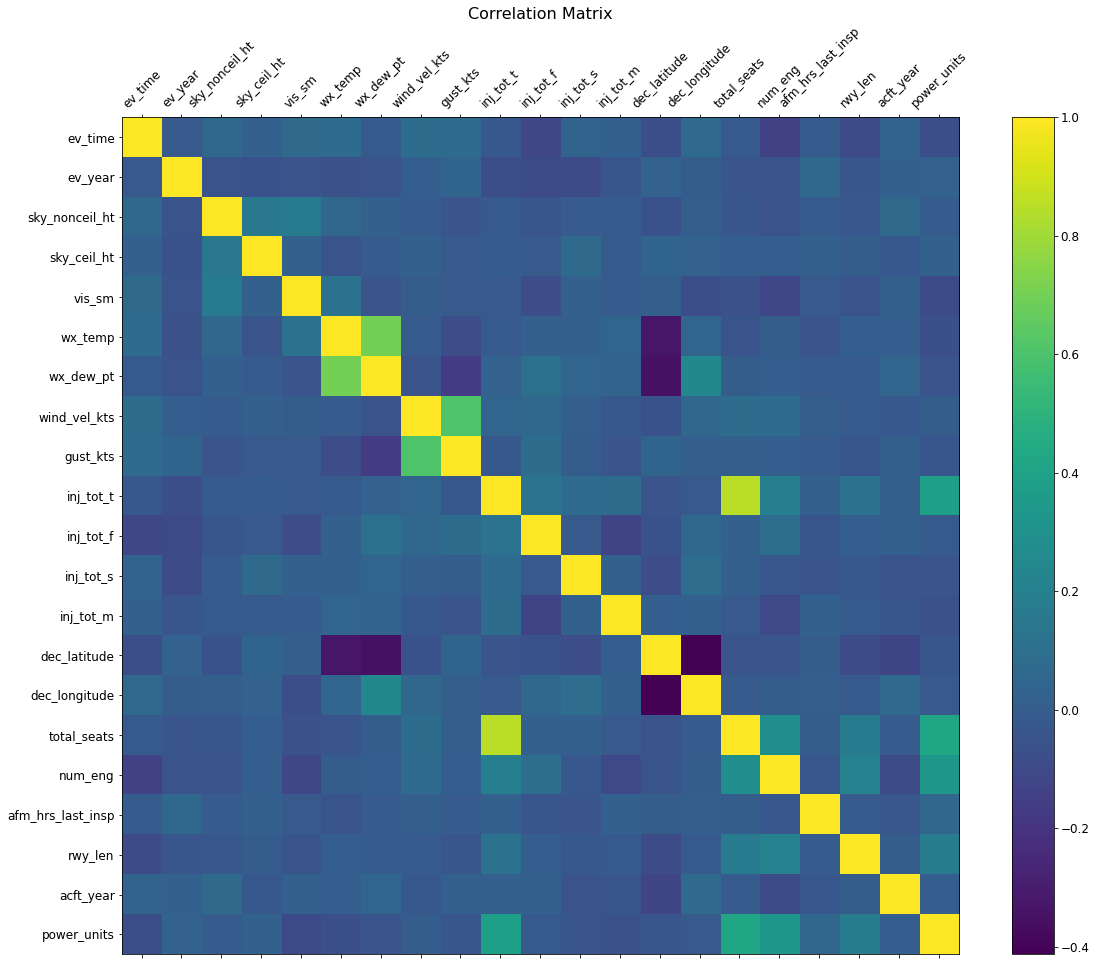

In [29]:
# obtained from https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
f = plt.figure(figsize=(19, 15))
plt.matshow(X_number.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=12, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize=16);

In [30]:
Y=X_full.inj_tot_t


In [31]:
(df_train, df_test) = train_test_split(X_full, train_size=0.8, test_size=0.2, random_state=0)
df_train.head()

lr = LinearRegression()

lr.fit(X, Y)
cv_results = cross_validate(lr, X, Y, return_train_score = True)
R2_train = cv_results['train_score'].mean()
R2_valid = cv_results['test_score'].mean()
print('Train R2', R2_train.round(2))
print('Validation R2', R2_valid.round(2))
#print('training R2 = ', R2_train.round(2))

Train R2 0.74
Validation R2 0.2


In [32]:
coef = lr.coef_
coef = pd.Series(coef, index = X.columns)
coef.sort_values(ascending=False).round(2)

total_seats                 0.81
acft_fire_IFLT              0.51
eng_type_REC                0.48
light_cond_DAWN             0.48
damage_MINR                 0.42
light_cond_NBRT             0.35
eng_type_TP                 0.32
eng_type_TS                 0.30
inj_tot_f                   0.15
power_units                 0.14
acft_fire_BOTH              0.13
inj_tot_m                   0.11
second_pilot_Y              0.09
carb_fuel_injection_CARB    0.08
inj_tot_s                   0.07
acft_year                   0.05
ev_country_CQ               0.04
vis_sm                      0.02
afm_hrs_last_insp           0.02
sky_nonceil_ht              0.01
wx_dew_pt                   0.01
wx_temp                     0.01
dec_latitude                0.01
wind_vel_kts               -0.01
light_cond_DAYL            -0.01
sky_ceil_ht                -0.01
rwy_len                    -0.02
ev_time                    -0.02
ev_year                    -0.02
gust_kts                   -0.02
dec_longit

In [8]:
scores = cross_validate(lr, X, Y, return_train_score=True)
R2_train = scores['train_score'].mean()
R2_valid = scores['test_score'].mean()
print('Train R2', R2_train.round(2))
print('Test R2', R2_valid.round(2))

Train R2 0.74
Test R2 0.2
